In [1]:
## PROJECT CODE

In [50]:
from requests import get
url = 'https://www.csfd.cz/zebricky/nejoblibenejsi-filmy/?show=complete'
response = get(url)
print(response.text[:500])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN" "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="cs" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://developers.facebook.com/schema/">
<head>
	<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
	<meta name="description" content="ČSFD.cz">
	<meta name="theme-color" content="#bb0011">


	<title>Žebříčky | ČSFD.cz</title>

	<link rel="shortcut icon" href="htt


In [51]:
from bs4 import BeautifulSoup


In [52]:
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [53]:
movie_containers = html_soup.find_all('td', class_ = 'film')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
300


In [54]:
movie_containers

[<td class="film" id="chart-10135"><a href="/film/10135-forrest-gump/">Forrest Gump</a> <span class="film-year" dir="ltr">(1994)</span></td>,
 <td class="film" id="chart-2294"><a href="/film/2294-vykoupeni-z-veznice-shawshank/">Vykoupení z věznice Shawshank</a> <span class="film-year" dir="ltr">(1994)</span></td>,
 <td class="film" id="chart-8852"><a href="/film/8852-pulp-fiction-historky-z-podsveti/">Pulp Fiction: Historky z podsvětí</a> <span class="film-year" dir="ltr">(1994)</span></td>,
 <td class="film" id="chart-223734"><a href="/film/223734-temny-rytir/">Temný rytíř</a> <span class="film-year" dir="ltr">(2008)</span></td>,
 <td class="film" id="chart-4711"><a href="/film/4711-pan-prstenu-spolecenstvo-prstenu/">Pán prstenů: Společenstvo Prstenu</a> <span class="film-year" dir="ltr">(2001)</span></td>,
 <td class="film" id="chart-254156"><a href="/film/254156-pocatek/">Počátek</a> <span class="film-year" dir="ltr">(2010)</span></td>,
 <td class="film" id="chart-2292"><a href="/fi

In [55]:
first_movie = movie_containers[0]

In [56]:
first_movie

<td class="film" id="chart-10135"><a href="/film/10135-forrest-gump/">Forrest Gump</a> <span class="film-year" dir="ltr">(1994)</span></td>

In [57]:
first_movie.a

<a href="/film/10135-forrest-gump/">Forrest Gump</a>

In [58]:
first_name = first_movie.a.text

In [59]:
first_name

'Forrest Gump'

In [60]:
first_year = first_movie.find('span', class_ = 'film-year')
first_year

<span class="film-year" dir="ltr">(1994)</span>

In [61]:
first_year = first_year.text
first_year

'(1994)'

In [62]:
movie_ratings = html_soup.find_all('td', class_ = 'average')
print(type(movie_ratings))
print(len(movie_ratings))

<class 'bs4.element.ResultSet'>
300


In [63]:
first_rating = movie_ratings[0]

In [64]:
first_rating

<td class="average info">94,5%</td>

In [65]:
a=first_rating.text

In [66]:
a = float(first_rating.text.strip('%').replace(',','.'))


In [67]:
a

94.5

In [68]:
fans_number = html_soup.find_all('td', class_ = 'count')
print(type(fans_number))
print(len(fans_number))

<class 'bs4.element.ResultSet'>
300


In [69]:
first_fans_number = fans_number[0].text

In [70]:
first_fans_number

'19310 fanoušků'

In [71]:
favourite_order = html_soup.find_all('td', class_ = 'order')
print(type(favourite_order))
print(len(favourite_order))

<class 'bs4.element.ResultSet'>
300


In [72]:
first_movie_favourite = favourite_order[0].text

In [73]:
first_movie_favourite

'1.'

In [74]:
# Lists to store the scraped data in
names = []
years = []
csfd_ratings = []
fans = []
# Extract data from individual movie container
for container in movie_containers:
    
       # The name
        name = container.a.text
        names.append(name)
        # The year
        year = container.find('span', class_ = 'film-year').text
        years.append(year)


In [75]:
for container in movie_ratings:
        # The CSFD rating
        csfd = container.text
        csfd_ratings.append(csfd)


In [76]:
for container in fans_number:
        # The number of fans
        fan = container.text
        fans.append(fan)

In [77]:
import pandas as pd
movie_ratings = pd.DataFrame({'movie': names,
                       'year': years,
                       'csfd': csfd_ratings,
                      'fans number': fans
                       })
print(movie_ratings.info())
movie_ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
movie          300 non-null object
year           300 non-null object
csfd           300 non-null object
fans number    300 non-null object
dtypes: object(4)
memory usage: 9.5+ KB
None


,movie,year,csfd,fans number
0,Forrest Gump,(1994),"94,5%",19310 fanoušků
1,Vykoupení z věznice Shawshank,(1994),"95,3%",17904 fanoušků
2,Pulp Fiction: Historky z podsvětí,(1994),"90,6%",15975 fanoušků
3,Temný rytíř,(2008),"90,2%",10869 fanoušků
4,Pán prstenů: Společenstvo Prstenu,(2001),"90,4%",10023 fanoušků
5,Počátek,(2010),"88,6%",9078 fanoušků
6,Zelená míle,(1999),"92,8%",8399 fanoušků
7,Matrix,(1999),"90,1%",8192 fanoušků
8,Pán prstenů: Návrat krále,(2003),"90,3%",8090 fanoušků
9,Pelíšky,(1999),"91,2%",6997 fanoušků


In [148]:
#movie_ratings = movie_ratings[['movie', 'year', 'csfd', 'fans']] pro zmenu sloupcu
#movie_ratings.head()

In [78]:
movie_ratings['year'].unique()

array(['(1994)', '(2008)', '(2001)', '(2010)', '(1999)', '(2003)',
       '(1972)', '(2011)', '(1995)', '(2002)', '(2009)', '(1975)',
       '(2000)', '(1991)', '(2012)', '(2014)', '(2006)', '(1993)',
       '(2005)', '(1979)', '(1998)', '(2007)', '(1997)', '(1968)',
       '(1996)', '(1977)', '(1980)', '(2013)', '(2004)', '(1986)',
       '(1985)', '(1971)', '(1987)', '(1976)', '(1966)', '(1984)',
       '(1983)', '(2016)', '(1988)', '(1990)', '(1974)', '(1982)',
       '(1957)', '(1989)', '(2018)', '(1992)', '(2015)', '(1981)',
       '(1961)', '(1959)', '(1953)', '(1960)', '(1973)', '(2017)',
       '(1969)'], dtype=object)

In [79]:
movie_ratings['csfd'].unique()

array(['94,5%', '95,3%', '90,6%', '90,2%', '90,4%', '88,6%', '92,8%',
       '90,1%', '90,3%', '91,2%', '91,8%', '91,4%', '88,1%', '92,3%',
       '88,3%', '82,3%', '92,6%', '85,8%', '90,7%', '82,6%', '87,6%',
       '86,2%', '84,8%', '87,4%', '84,1%', '87,8%', '84,4%', '92,4%',
       '87,9%', '87,3%', '89,6%', '89,1%', '85,7%', '88,0%', '86,3%',
       '87,0%', '81,1%', '89,7%', '84,6%', '83,5%', '89,5%', '81,9%',
       '86,9%', '88,5%', '81,6%', '84,0%', '82,8%', '89,3%', '86,7%',
       '86,4%', '90,5%', '88,2%', '88,8%', '77,2%', '77,4%', '78,2%',
       '82,7%', '80,1%', '84,7%', '85,1%', '86,5%', '90,0%', '87,2%',
       '88,7%', '79,8%', '80,9%', '78,8%', '80,7%', '66,6%', '86,8%',
       '84,2%', '81,0%', '88,4%', '86,1%', '78,4%', '90,9%', '81,4%',
       '89,0%', '81,7%', '77,0%', '83,0%', '78,7%', '80,2%', '87,1%',
       '86,6%', '77,7%', '77,5%', '79,0%', '79,6%', '80,8%', '80,4%',
       '51,9%', '73,2%', '85,5%', '80,6%', '72,2%', '85,9%', '87,5%',
       '80,0%', '82,

In [80]:
#removing %
movie_ratings.loc[:, 'csfd'] = movie_ratings['csfd'].str.strip('%')

In [81]:
#as float
movie_ratings.loc[:, 'csfd'] = movie_ratings['csfd'].str.replace(',','.').astype(float)

In [82]:
movie_ratings['csfd'].head(3)

0    94.5
1    95.3
2    90.6
Name: csfd, dtype: float64

In [83]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)

In [84]:
movie_ratings['year'].head(3)

0    1994
1    1994
2    1994
Name: year, dtype: int32

In [87]:
#removing 'fanoušků'
movie_ratings.loc[:, 'fans number'] = movie_ratings['fans number'].str.strip('fanoušků')

In [88]:
movie_ratings['fans number'].head(3)

0    19310 
1    17904 
2    15975 
Name: fans number, dtype: object

In [89]:
#as integer
movie_ratings.loc[:, 'fans number'] = movie_ratings['fans number'].astype(int)

In [90]:
movie_ratings['fans number'].head(3)

0    19310
1    17904
2    15975
Name: fans number, dtype: int32

In [92]:
movie_ratings.describe().loc[['min', 'max'], ['csfd', 'fans number']]

,csfd,fans number
min,51.9,593.0
max,96.1,19310.0


In [99]:
from sklearn import preprocessing
import numpy as np

In [123]:
#normalizing csfd rating and number of fans in order to compare distributions
column_names_to_normalize = ['fans number', 'csfd']
x = movie_ratings[column_names_to_normalize].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
movie_ratings_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = movie_ratings.index)
movie_ratings[column_names_to_normalize] = movie_ratings_temp

In [124]:
movie_ratings

,movie,year,csfd,fans number
0,Forrest Gump,1994,0.963801,1.000000
1,Vykoupení z věznice Shawshank,1994,0.981900,0.924881
2,Pulp Fiction: Historky z podsvětí,1994,0.875566,0.821820
3,Temný rytíř,2008,0.866516,0.549020
4,Pán prstenů: Společenstvo Prstenu,2001,0.871041,0.503820
5,Počátek,2010,0.830317,0.453331
6,Zelená míle,1999,0.925339,0.417054
7,Matrix,1999,0.864253,0.405995
8,Pán prstenů: Návrat krále,2003,0.868778,0.400545
9,Pelíšky,1999,0.889140,0.342149


In [125]:
import matplotlib.pyplot as plt

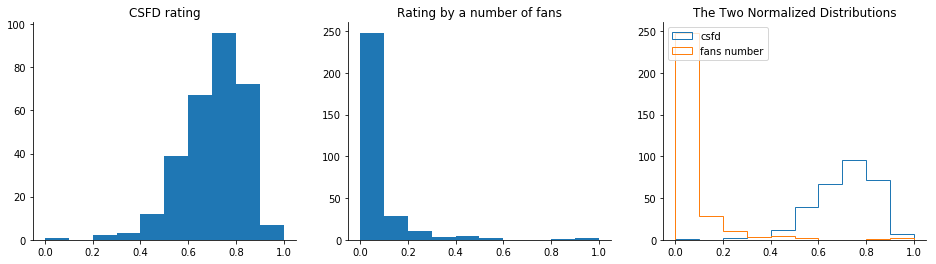

In [127]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes

ax1.hist(movie_ratings['csfd'], bins = 10, range = (0,1)) # bin range = 1
ax1.set_title('CSFD rating')

ax2.hist(movie_ratings['fans number'], bins = 10, range = (0,1)) # bin range = 10
ax2.set_title('Rating by a number of fans')

ax3.hist(movie_ratings['csfd'], bins = 10, range = (0,1), histtype = 'step')
ax3.hist(movie_ratings['fans number'], bins = 10, range = (0,1), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()